In [7]:
import os
import pandas as pd
import numpy as np
import get_sub_index
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Define directories
data_dir = "../data/ProcessedData/"
output_dir = "../data/AQIData/"
os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists

In [9]:
# List of stations
stations = ["alandur", "velachery", "manali"]


==== ALANDUR - RAW DATA HEAD ====
             Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
0  2021-01-01 00:00:00          21.20        219.03        4.19        11.28   
1  2021-01-01 01:00:00          21.20        219.03        4.27        11.34   
2  2021-01-01 02:00:00          19.44        219.03        4.27        11.29   
3  2021-01-01 03:00:00          18.66        219.03        4.22        11.30   
4  2021-01-01 04:00:00          17.44        219.03        4.24        11.24   

   NH3 (µg/m³)  SO2 (µg/m³)  Ozone (µg/m³)  Benzene (µg/m³)  Toluene (µg/m³)  \
0         2.62         8.32           0.93             0.00             2.15   
1         2.62         8.14           0.49             0.00             0.00   
2         2.62         8.24           0.74             0.00             0.00   
3         2.62         8.21           0.67             1.33             0.00   
4         2.62         8.30           1.14             1.88             0.00   

   

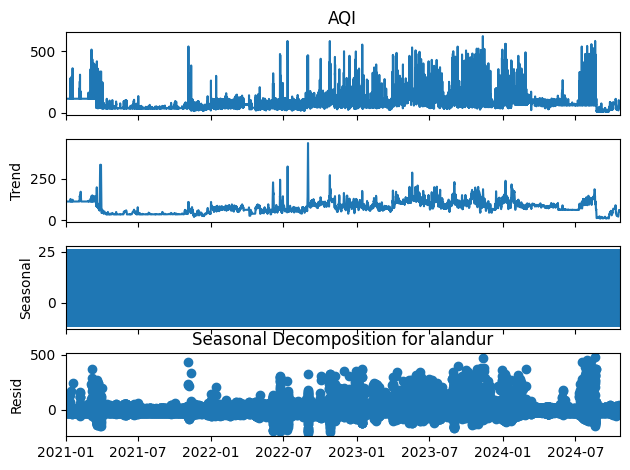

/tmp/ipykernel_36675/182859279.py:75: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df['AQI'] = df['AQI'].interpolate(method='linear')


✅ Saved daily AQI data for alandur: ../data/AQIData/alandur_daily_aqi.csv

==== ALANDUR - DAILY AQI DATA SAMPLE ====
                  AQI
Timestamp            
2024-10-11  46.429931
2024-10-12  27.747986
2024-10-13  30.042361
2024-10-14  29.684236
2024-10-15  25.811875
2024-10-16  21.264306
2024-10-17  49.732986
2024-10-18  52.987708
2024-10-19  56.893125
2024-10-20  53.032292

==== VELACHERY - RAW DATA HEAD ====
             Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
0  2021-01-01 00:00:00          82.20         16.53        0.21         6.60   
1  2021-01-01 01:00:00          53.29         16.53        0.24         6.63   
2  2021-01-01 02:00:00          49.86         16.53        0.24         6.52   
3  2021-01-01 03:00:00          38.33         16.53        0.30         7.14   
4  2021-01-01 04:00:00          34.60         16.53        0.62         9.07   

   NH3 (µg/m³)  SO2 (µg/m³)  Ozone (µg/m³)  Benzene (µg/m³)  Toluene (µg/m³)  \
0        17.99       

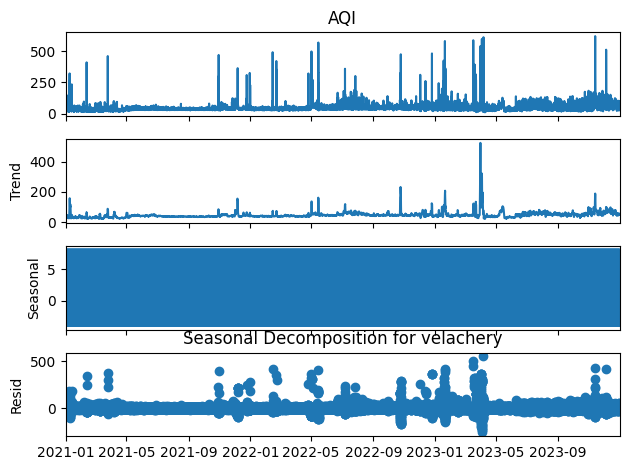

/tmp/ipykernel_36675/182859279.py:75: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df['AQI'] = df['AQI'].interpolate(method='linear')


✅ Saved daily AQI data for velachery: ../data/AQIData/velachery_daily_aqi.csv

==== VELACHERY - DAILY AQI DATA SAMPLE ====
                  AQI
Timestamp            
2023-12-22  78.468961
2023-12-23  73.599721
2023-12-24  55.178773
2023-12-25  44.717057
2023-12-26  58.973865
2023-12-27  49.862180
2023-12-28  53.979411
2023-12-29  49.974192
2023-12-30  51.959538
2023-12-31  57.165602

==== MANALI - RAW DATA HEAD ====
             Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
0  2021-01-01 00:00:00          46.62          88.2       14.45         5.28   
1  2021-01-01 01:00:00          46.61          88.2        7.61         5.29   
2  2021-01-01 02:00:00          45.99          88.2       10.92         6.11   
3  2021-01-01 03:00:00          45.32          88.2        9.07         4.29   
4  2021-01-01 04:00:00          44.47          88.2       10.20         5.96   

   NH3 (µg/m³)  SO2 (µg/m³)  Ozone (µg/m³)  Benzene (µg/m³)  Toluene (µg/m³)  \
0        48.32    

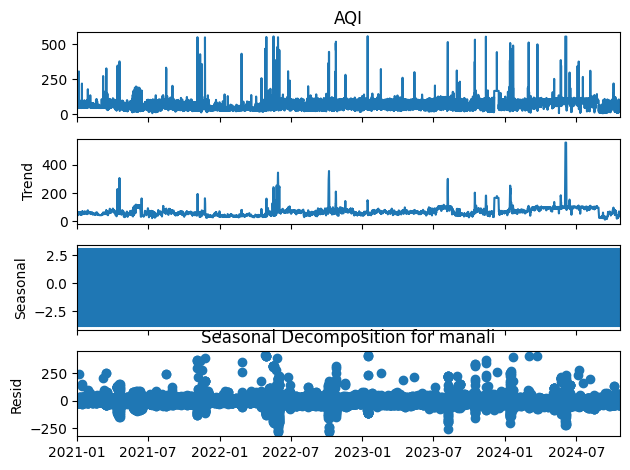

/tmp/ipykernel_36675/182859279.py:75: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df['AQI'] = df['AQI'].interpolate(method='linear')


✅ Saved daily AQI data for manali: ../data/AQIData/manali_daily_aqi.csv

==== MANALI - DAILY AQI DATA SAMPLE ====
                  AQI
Timestamp            
2024-10-11  55.354167
2024-10-12  22.424931
2024-10-13  22.017500
2024-10-14  41.591875
2024-10-15  25.880833
2024-10-16  36.668333
2024-10-17  40.463958
2024-10-18  70.687500
2024-10-19  51.172292
2024-10-20  45.479375

🎉 Processing complete!


In [14]:
# Process each station separately
for station in stations:
    file_path = os.path.join(data_dir, f"{station}_cleaned.csv")
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue

    # Load data
    df = pd.read_csv(file_path)

    print(f"\n==== {station.upper()} - RAW DATA HEAD ====")
    print(df.head())

    # Convert timestamp column
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    df.set_index("Timestamp", inplace=True)  # Ensure Timestamp is the index

    # Ensure all numeric columns are float
    for column in df.columns:
        if column != "station":  # Exclude station name if present
            df[column] = pd.to_numeric(df[column], errors='coerce')

    print(f"\n==== {station.upper()} - DATA INFO ====")
    print(df.info())

    # AQI Sub-Index Calculation
    df["PM2.5_SubIndex"] = df["PM2.5 (µg/m³)"].apply(lambda x: get_sub_index.get_PM25_subindex(x))
    df["PM10_SubIndex"] = df["PM10 (µg/m³)"].apply(lambda x: get_sub_index.get_PM10_subindex(x))
    df["CO_SubIndex"] = df["CO (µg/m³)"].apply(lambda x: get_sub_index.get_CO_subindex(x))
    df["Ozone_SubIndex"] = df["Ozone (µg/m³)"].apply(lambda x: get_sub_index.get_O3_subindex(x))
    df["SO2_SubIndex"] = df["SO2 (µg/m³)"].apply(lambda x: get_sub_index.get_SO2_subindex(x))
    df["NOx_SubIndex"] = df["NOx (µg/m³)"].apply(lambda x: get_sub_index.get_NOx_subindex(x))

    # Select relevant columns
    df = df[['PM2.5 (µg/m³)', 'PM2.5_SubIndex', 'PM10 (µg/m³)', 'PM10_SubIndex', 
             'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx_SubIndex',
             'CO (µg/m³)', 'CO_SubIndex', 'Ozone (µg/m³)', 'Ozone_SubIndex', 
             'SO2 (µg/m³)', 'SO2_SubIndex']]

    # AQI Calculation (Max Sub-Index Method)
    df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                   (df["PM10_SubIndex"] > 0).astype(int) + \
                   (df["NOx_SubIndex"] > 0).astype(int) + \
                   (df["CO_SubIndex"] > 0).astype(int) + \
                   (df["SO2_SubIndex"] > 0).astype(int) + \
                   (df["Ozone_SubIndex"] > 0).astype(int)

    df["AQI"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "NOx_SubIndex", 
                          "CO_SubIndex", "Ozone_SubIndex", "SO2_SubIndex"]].max(axis=1))

    # Remove invalid AQI values (where less than 3 pollutants are available)
    df.loc[df["Checks"] < 3, "AQI"] = np.nan

    # Save hourly AQI data
    output_path = os.path.join(output_dir, f"{station}_hourly_aqi.csv")
    df.to_csv(output_path)
    print(f"✅ Saved hourly AQI data for {station}: {output_path}")

    print(f"\n==== {station.upper()} - HOURLY AQI DATA SAMPLE ====")
    print(df[["AQI"]].tail(30))  # Debug last 30 rows

    # Ensure hourly frequency for ARIMA
    df = df.asfreq('h')

    # Seasonal Decomposition (24-hour cycle)
    try:
        decomp = sm.tsa.seasonal_decompose(df['AQI'], period=24, model='additive')
        decomp.plot()
        plt.title(f"Seasonal Decomposition for {station}")
        plt.show()
    except Exception as e:
        print(f"⚠️ Could not decompose {station}'s AQI data: {e}")

    # Fill missing AQI values before resampling to daily
    df['AQI'] = df['AQI'].interpolate(method='linear')
    
    # Convert all pollutant-related columns to numeric
    cols_to_convert = ["PM2.5 (µg/m³)", "PM10 (µg/m³)", "CO (µg/m³)", 
                   "Ozone (µg/m³)", "SO2 (µg/m³)", "NOx (µg/m³)", "AQI"]
    for col in cols_to_convert:
      if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")  # Convert to float, force NaN for bad values

    # Resample to daily AQI and drop empty days
    df_daily = df.resample('D').mean()

    output_daily_path = os.path.join(output_dir, f"{station}_daily_aqi.csv")
    df_daily.to_csv(output_daily_path)
    print(f"✅ Saved daily AQI data for {station}: {output_daily_path}")

    print(f"\n==== {station.upper()} - DAILY AQI DATA SAMPLE ====")
    print(df_daily[["AQI"]].tail(10))  # Debug last 10 rows

print("\n🎉 Processing complete!")
